In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score, f1_score,roc_auc_score
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import StratifiedKFold

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df=pd.read_csv("/content/drive/MyDrive/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# **Primary Inspection**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                


## As we can see that there are no Null Values.

In [8]:
df.shape

(1470, 35)

In [9]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:

df['EmployeeNumber'].value_counts()	

2046    1
641     1
644     1
645     1
647     1
       ..
1364    1
1367    1
1368    1
1369    1
2048    1
Name: EmployeeNumber, Length: 1470, dtype: int64


### AS we can see that this feature is unique identifier and cannot be considered for building the model.

In [11]:
df.drop(columns='EmployeeNumber',inplace=True)

In [12]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom


##  We can see there are fetaures having just 1 unique values. 
## Hence we can drop them.

In [13]:
for i in df.columns:
  if df[i].nunique()<2:
    df.drop(columns=i,inplace=True)


In [14]:
df.shape

(1470, 31)

# **EDA**

### **Checking the Normailization**

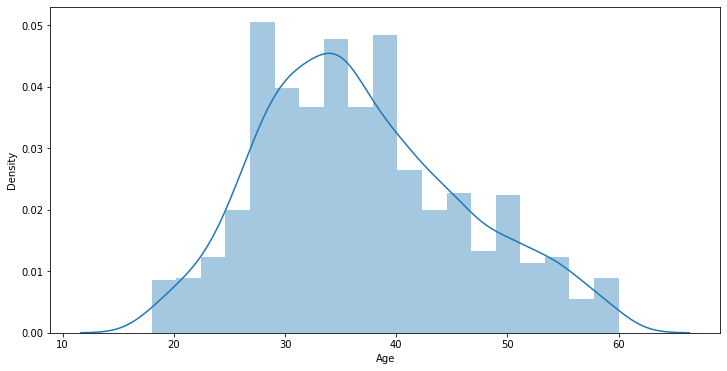

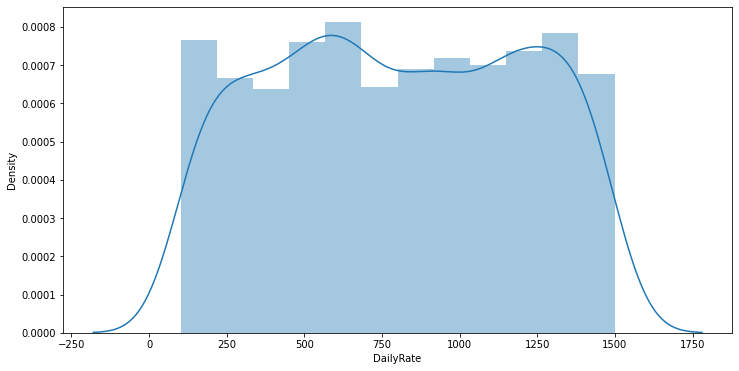

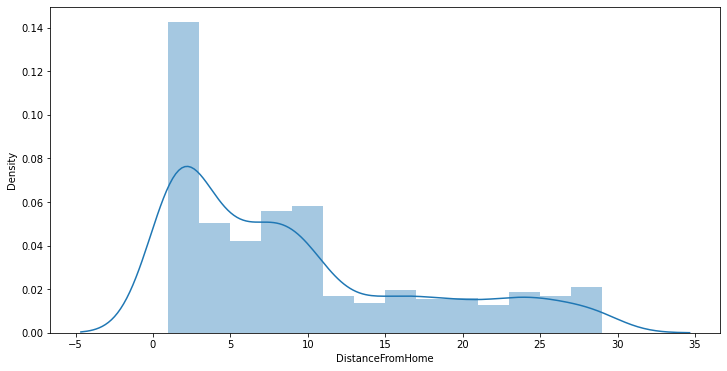

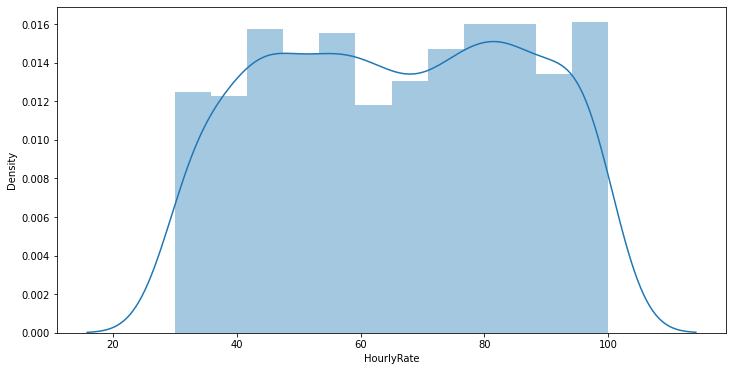

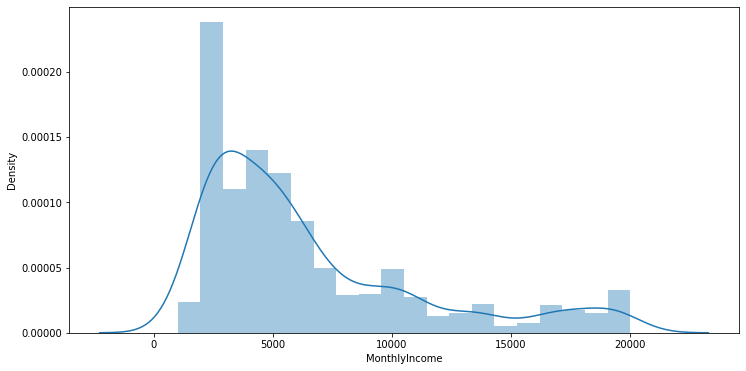

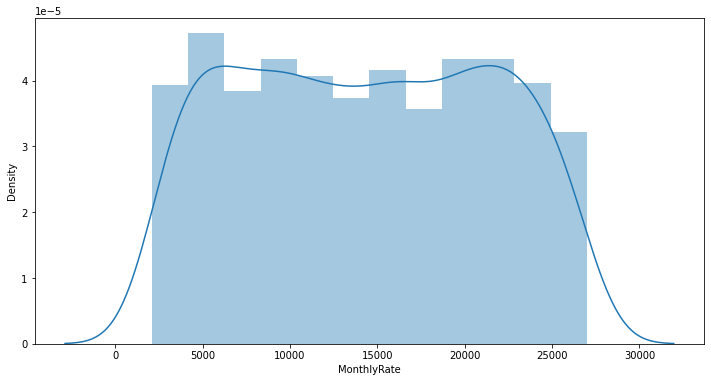

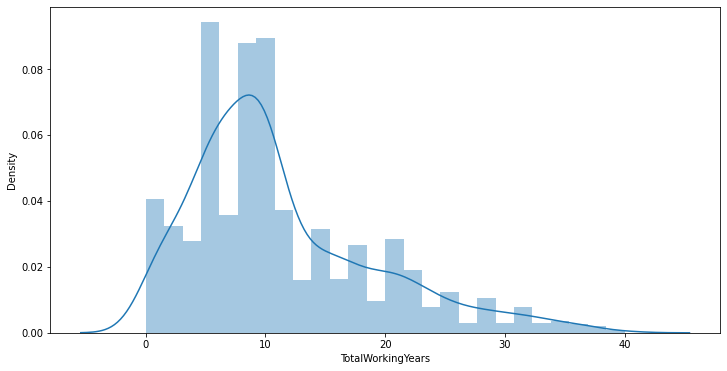

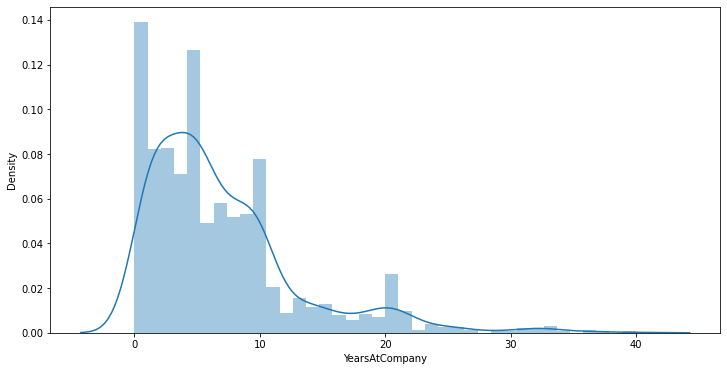

In [15]:
for i in df.drop(columns='Attrition').columns:
  if df[i].nunique()>20:
    plt.figure(figsize=(12,6))
    sns.distplot(x=df[i])
    plt.xlabel(i,fontsize=10)
    plt.show()


## So there are few features that are not normally distributed.

## Scatter plot of features vs themselves and hue= attrition to check if we spot the separating line visually.

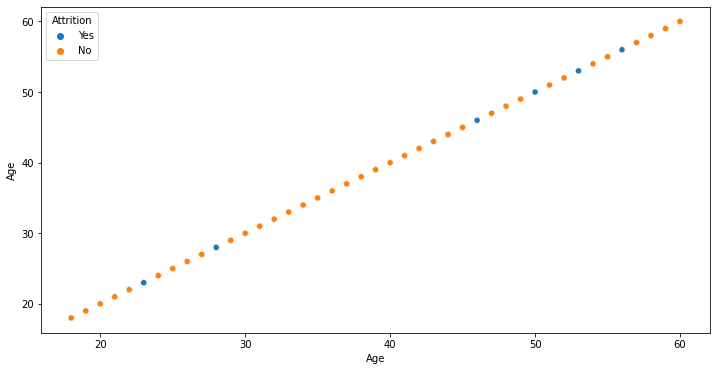

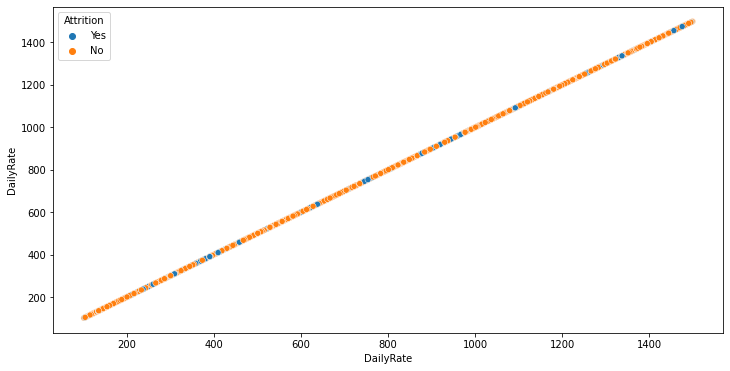

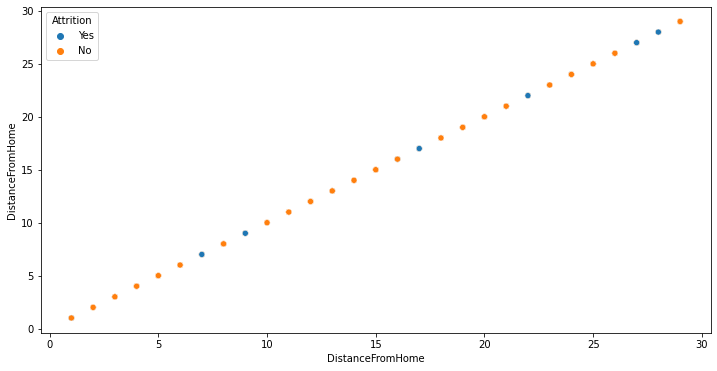

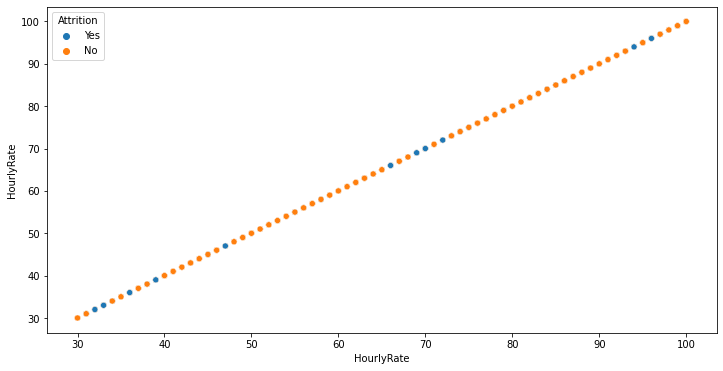

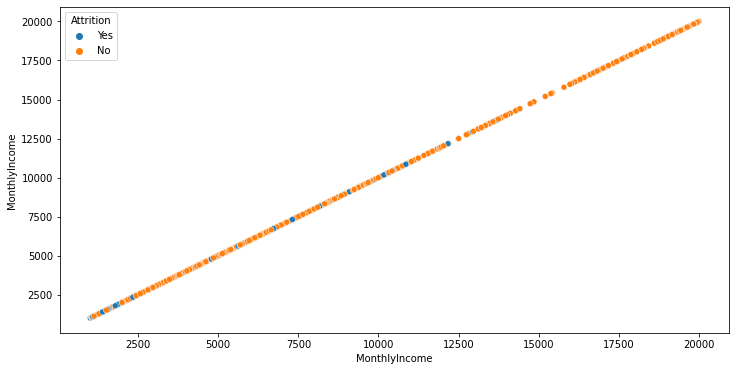

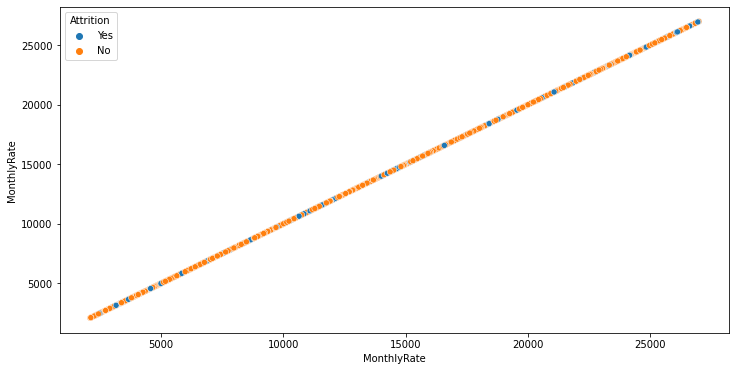

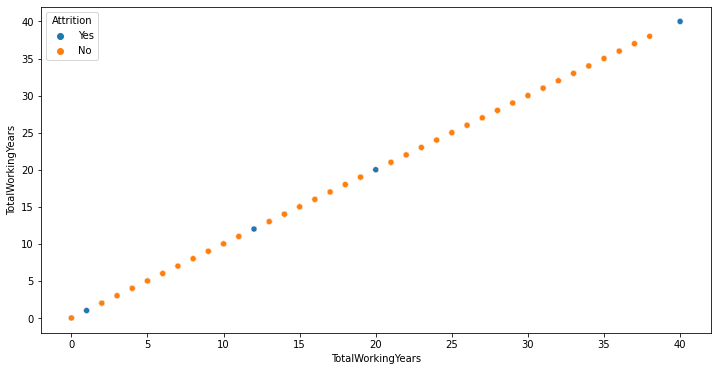

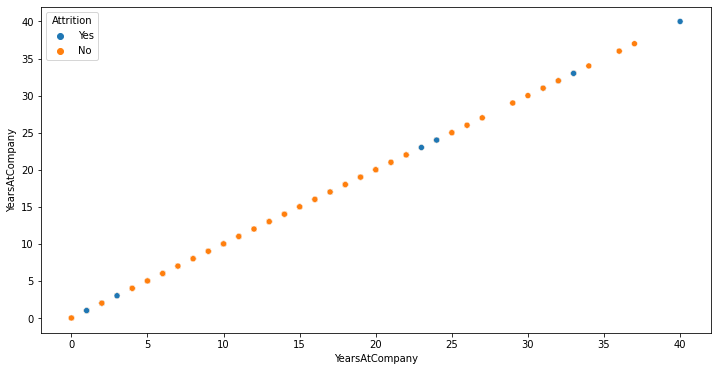

In [16]:
for i in df.drop(columns='Attrition').columns:
  if df[i].nunique()>20:
    plt.figure(figsize=(12,6))
    sns.scatterplot(x=df[i],y=df[i],hue=df['Attrition'])
    plt.show()


## Here after ploting we can see that the two clases seem to be intertwined with each other after plotting them in 2d- fetaure space.

## **Reducing the grouping by binning few features.**

###YearsWithCurrManager

In [17]:
labels=[0,1,2]
bins = [0,4,10,25]
df['yrs_with_curr_man'] = pd.cut(df['YearsWithCurrManager'] , bins=bins, labels=labels, include_lowest=True)

In [18]:
df['yrs_with_curr_man']=df['yrs_with_curr_man'].astype('int')

In [19]:
df.drop(columns=['YearsWithCurrManager'],inplace=True)

In [20]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,yrs_with_curr_man
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,1


###PercentSalaryHike

In [21]:
labels=[0,1,2]
bins = [0,14,20,40]
df['new_percent_salary_hike'] = pd.cut(df['PercentSalaryHike'] , bins=bins, labels=labels, include_lowest=True)

In [22]:
df['new_percent_salary_hike']=df['new_percent_salary_hike'].astype('int')

In [23]:
df.drop(columns=['PercentSalaryHike'],inplace=True)

###YearsInCurrentRole

In [24]:
labels=[0,1,2]
bins = [0,4,10,25]
df['yrs_in_curr_role'] = pd.cut(df['YearsInCurrentRole'] , bins=bins, labels=labels, include_lowest=True)

In [25]:
df['yrs_in_curr_role']=df['yrs_in_curr_role'].astype('int')

In [26]:
df.drop(columns=['YearsInCurrentRole'],inplace=True)

###Age

In [27]:
labels=[0,1,2,3]
bins = [0,18, 25,40,100]
df['new_age'] = pd.cut(df['Age'] , bins=bins, labels=labels, include_lowest=True)

In [28]:
df['new_age']=df['new_age'].astype('int')

###Monthly Income

In [29]:
labels=[0,1,2]
bins = [0,7500,12500,40000]
df['new_monthly_income'] = pd.cut(df['MonthlyIncome'] , bins=bins, labels=labels, include_lowest=True)

In [30]:
df['new_monthly_income']=df['new_monthly_income'].astype('int')

In [31]:
df.drop(columns=['Age','MonthlyIncome'],inplace=True)

###YearsSinceLastPromotion

In [32]:
labels=[0,1,2]
bins = [0,4,10,25]
df['yrs_in_last_promo'] = pd.cut(df['YearsSinceLastPromotion'] , bins=bins, labels=labels, include_lowest=True)

In [33]:
df['yrs_in_last_promo']=df['yrs_in_last_promo'].astype('int')

In [34]:
df.drop(columns=['YearsSinceLastPromotion'],inplace=True)

## **Plotting the Value Counts**

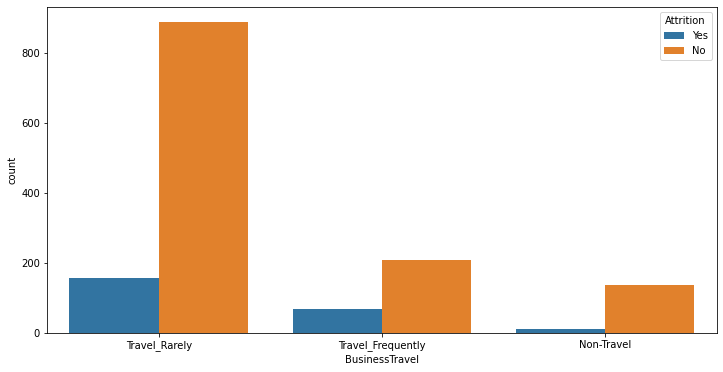

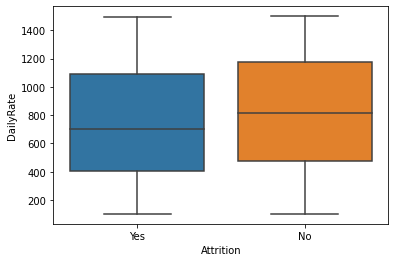

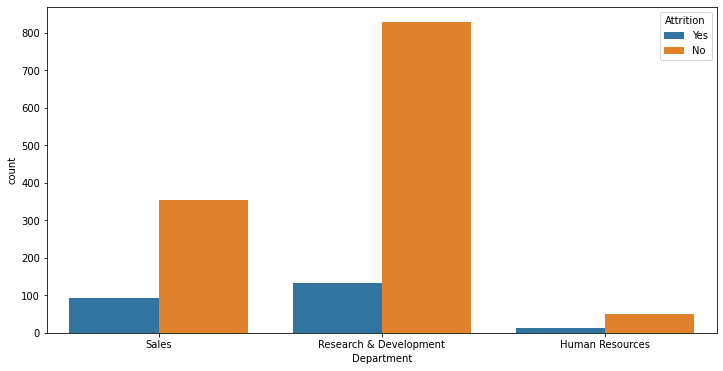

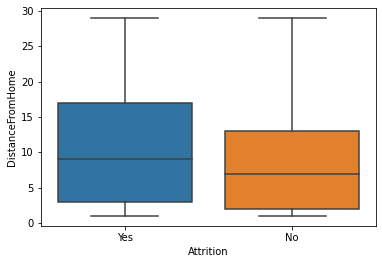

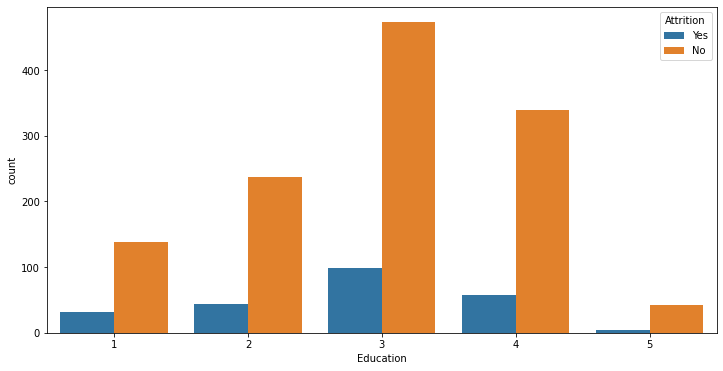

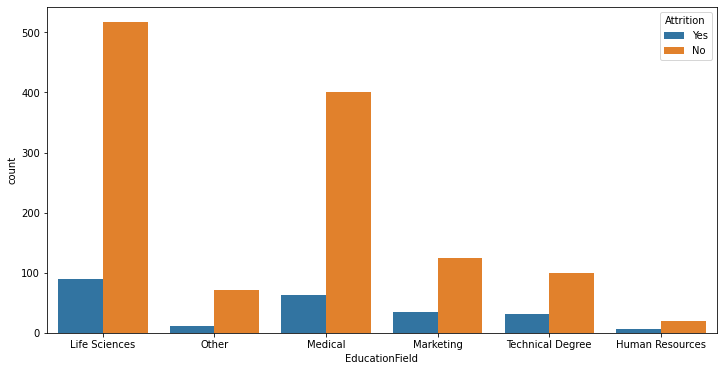

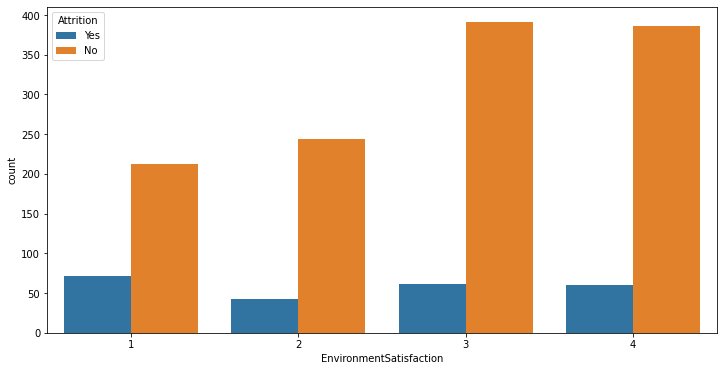

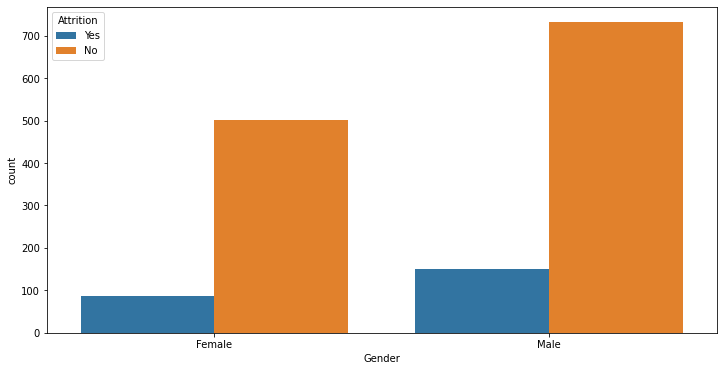

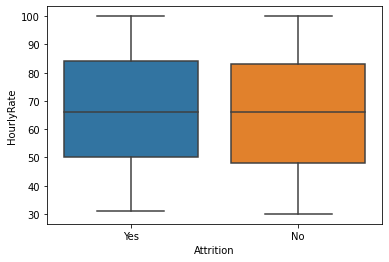

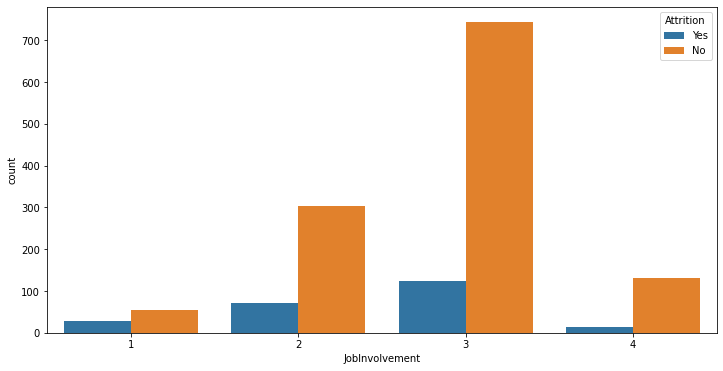

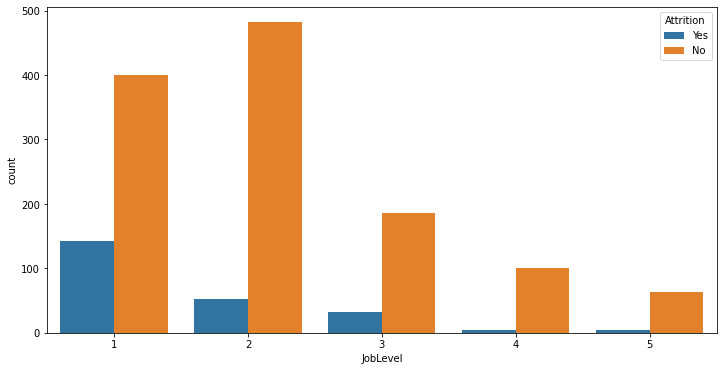

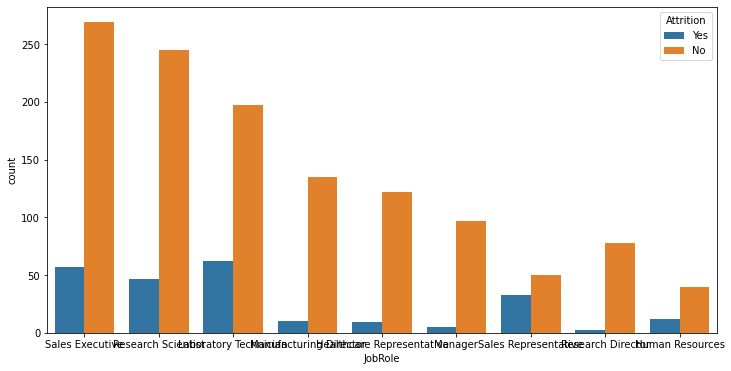

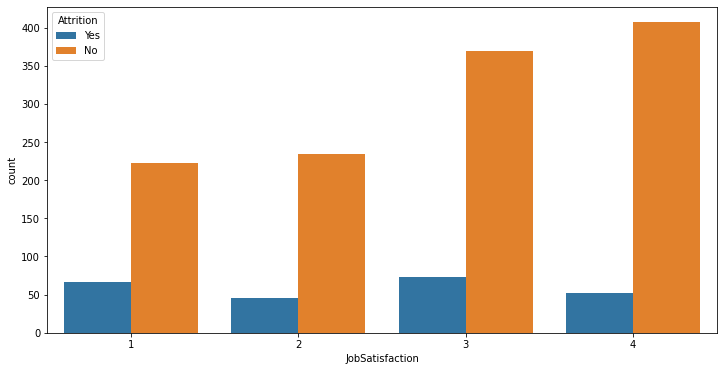

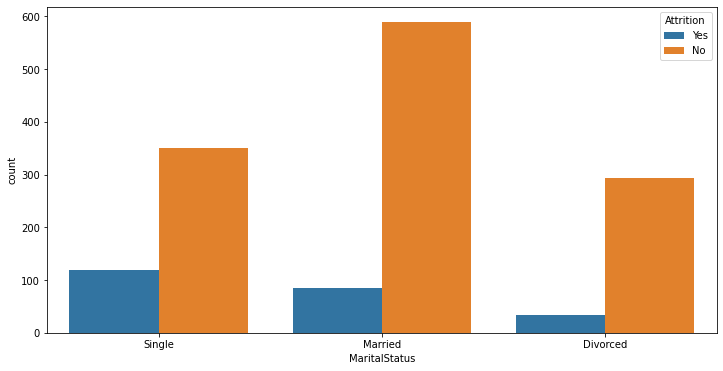

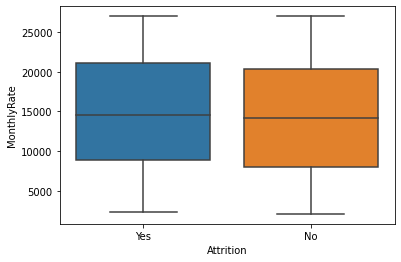

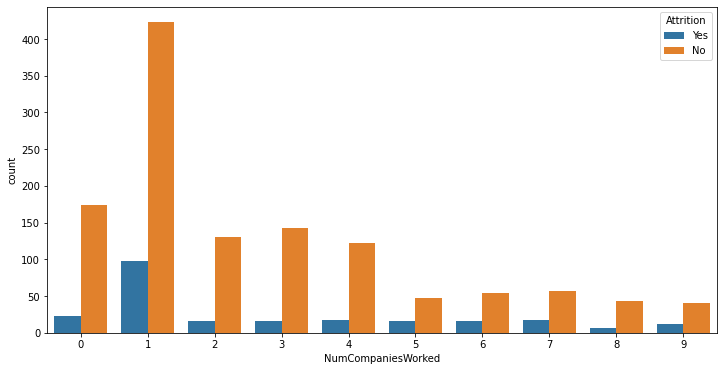

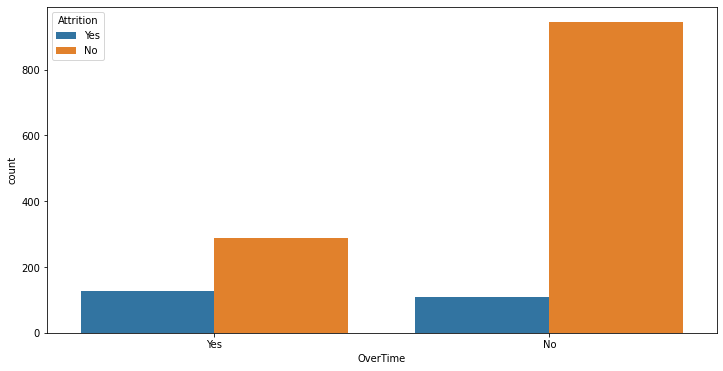

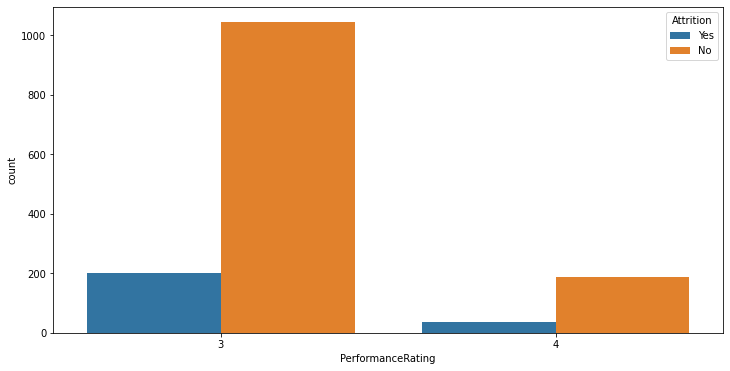

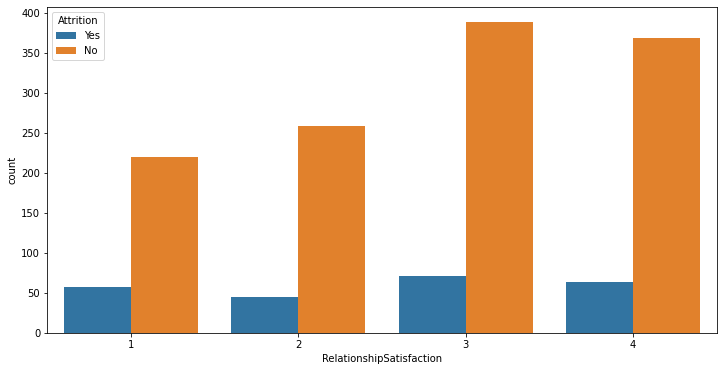

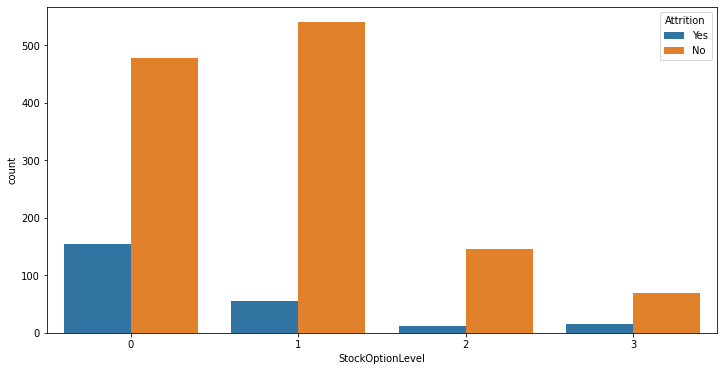

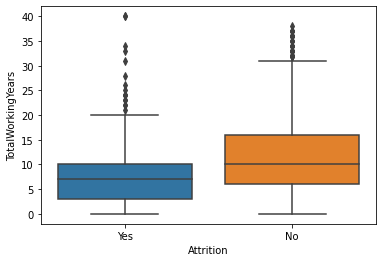

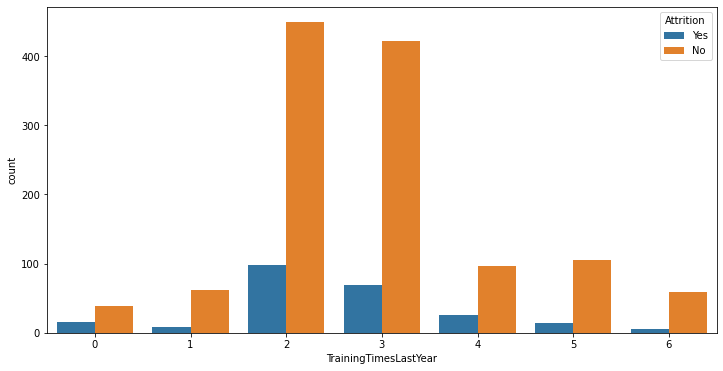

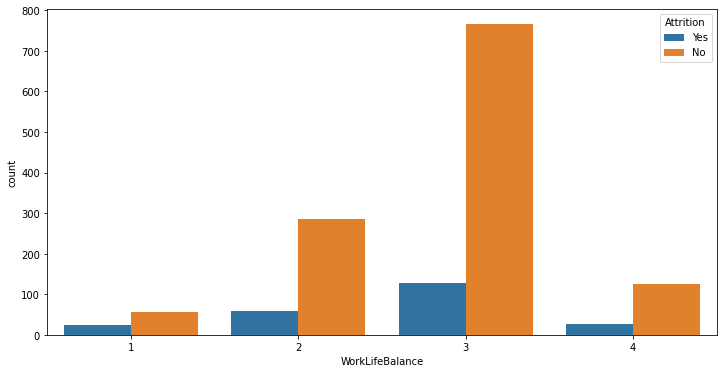

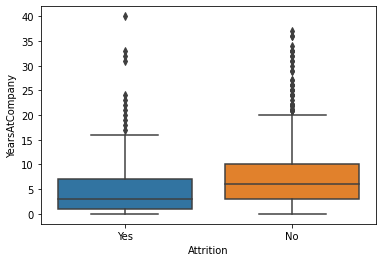

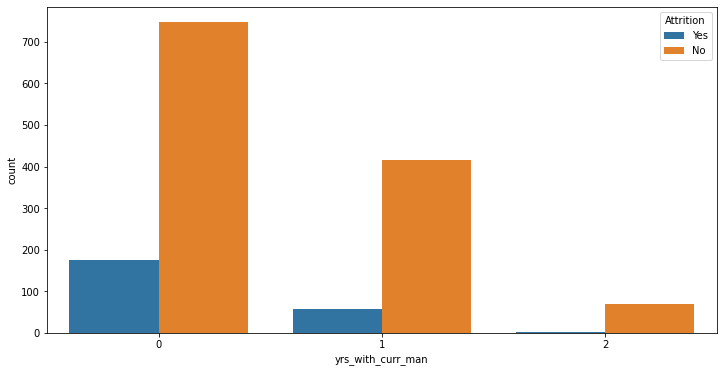

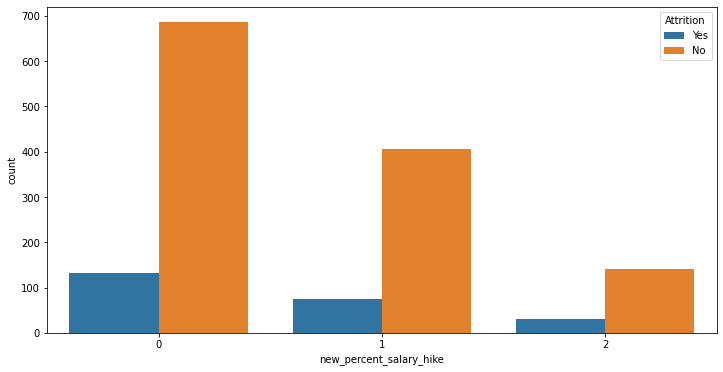

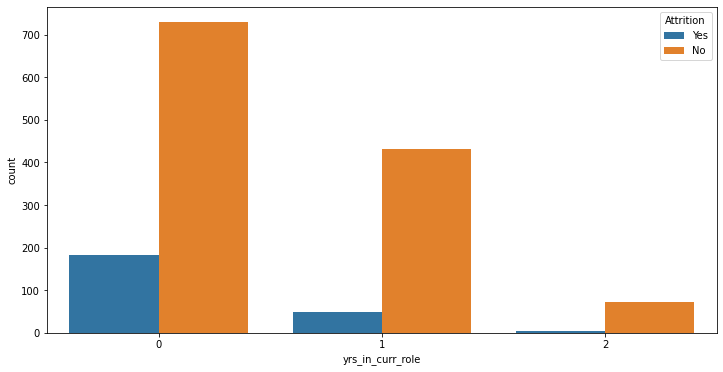

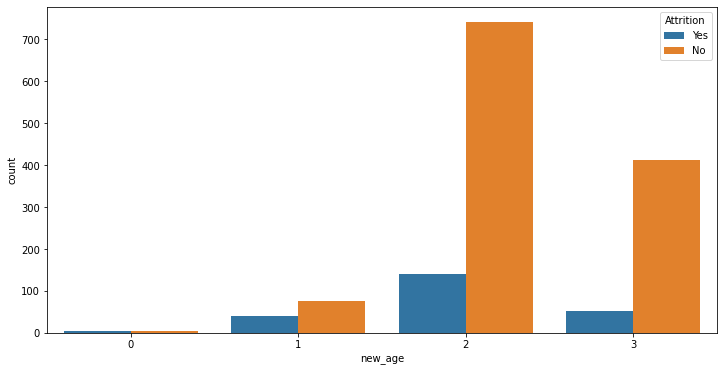

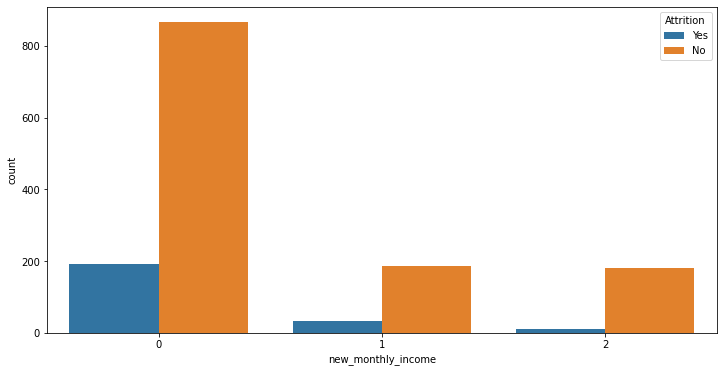

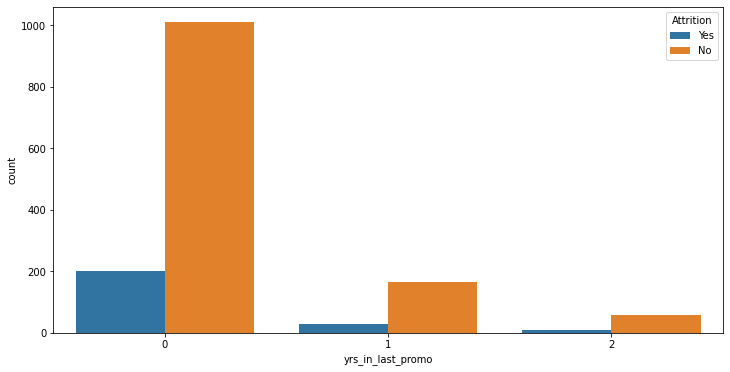

In [35]:
for i in df.drop(columns='Attrition').columns:
  if df[i].nunique()<20:
    plt.figure(figsize=(12,6))
    sns.countplot(x=df[i],hue=df['Attrition'])
    plt.show()
  else:
    sns.boxplot(x=df['Attrition'],y=df[i])
    plt.show()


##As we can see in step above that there has been high attrition when the distance of the work place has been far from home.


## **Changing the Attrition column to a numerical one.**

In [36]:
df['Attrition']=df['Attrition'].apply(lambda x: 1 if x=='Yes' else 0)

In [37]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

## **We can see that the dataset is higly imbalanced.**

In [38]:
X=df.drop(columns='Attrition')
y=df['Attrition']

## **One Hot Encoding**

In [39]:
encod=[x  for x in X.columns if x not in X.describe().columns]

In [40]:
X=pd.get_dummies(X, columns=encod,drop_first=True )

In [41]:
X.head(2)

,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,yrs_with_curr_man,new_percent_salary_hike,yrs_in_curr_role,new_age,new_monthly_income,yrs_in_last_promo,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,1102,1,2,2,94,3,2,4,19479,8,3,1,0,8,0,1,6,1,0,0,3,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,279,8,1,3,61,2,2,2,24907,1,4,4,1,10,3,3,10,1,2,1,3,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0


In [42]:
X.shape

(1470, 44)

# **Feature Selection**

### **Permutation Feature**

In [50]:
from sklearn.inspection import permutation_importance

In [53]:
perm_imp = permutation_importance(rf, X_test, y_test)

In [54]:
perm_imp.importances_mean

array([ 2.71739130e-03,  3.26086957e-03,  1.08695652e-03,  9.23913043e-03,
        4.34782609e-03,  1.03260870e-02,  9.23913043e-03,  3.26086957e-03,
        4.89130435e-03,  3.26086957e-03, -5.43478261e-04,  6.52173913e-03,
        3.80434783e-03,  1.08695652e-03,  2.71739130e-03,  3.26086957e-03,
        8.15217391e-03,  5.43478261e-04,  3.80434783e-03,  3.80434783e-03,
        2.22044605e-17,  2.17391304e-03,  2.17391304e-03,  2.71739130e-03,
       -1.63043478e-03,  2.71739130e-03,  3.26086957e-03,  2.22044605e-17,
        3.26086957e-03,  2.71739130e-03,  0.00000000e+00,  0.00000000e+00,
        3.26086957e-03,  2.71739130e-03,  4.34782609e-03,  0.00000000e+00,
        5.43478261e-04,  0.00000000e+00,  3.80434783e-03,  5.97826087e-03,
        1.08695652e-03,  3.26086957e-03, -5.43478261e-04,  2.17391304e-03])

In [55]:
feature_imp1=pd.DataFrame(zip(X.columns,perm_importance.importances_mean), columns=['columns','p_importance']).sort_values('p_importance',ascending=False)

In [56]:
feature_imp1.reset_index(drop=True,inplace=True)

In [57]:
feature_imp1['p_importance']

0     1.141304e-02
1     8.695652e-03
2     8.695652e-03
3     7.608696e-03
4     6.521739e-03
5     6.521739e-03
6     5.978261e-03
7     5.434783e-03
8     5.434783e-03
9     5.434783e-03
10    4.347826e-03
11    4.347826e-03
12    4.347826e-03
13    4.347826e-03
14    3.804348e-03
15    3.804348e-03
16    3.804348e-03
17    3.260870e-03
18    3.260870e-03
19    3.260870e-03
20    2.717391e-03
21    2.717391e-03
22    2.717391e-03
23    2.717391e-03
24    2.717391e-03
25    2.717391e-03
26    2.173913e-03
27    2.173913e-03
28    1.630435e-03
29    1.630435e-03
30    1.630435e-03
31    1.086957e-03
32    5.434783e-04
33    5.434783e-04
34    4.440892e-17
35    2.220446e-17
36    2.220446e-17
37    0.000000e+00
38    0.000000e+00
39    0.000000e+00
40    0.000000e+00
41    0.000000e+00
42   -5.434783e-04
43   -1.630435e-03
Name: p_importance, dtype: float64

In [65]:
impcols=feature_imp1['columns'][0:19]

### **Random Forest Classifier Features**

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y)

In [45]:
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
feature_=pd.DataFrame(zip(X.columns,rfc.feature_importances_), columns=['columns','importance']).sort_values('importance',ascending=False)

In [47]:
feature_.reset_index(drop=True,inplace=True)

In [48]:
feature_.head(5)

,columns,importance
0,DailyRate,0.068526
1,TotalWorkingYears,0.063134
2,MonthlyRate,0.060317
3,HourlyRate,0.059992
4,DistanceFromHome,0.058270


In [49]:
feature_['importance'][0:30].sum()

0.9077548419974638


##We can see that the model has placed the features with Grouping the data on top.


## **Separating the Input and Output Variables**

In [66]:
Xnew=X[impcols]
y=df['Attrition']

# **Support Vector Machine**

In [89]:
X_train,X_test,y_train,y_test=train_test_split(Xnew,y,test_size=0.30,stratify=y)

In [90]:
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [91]:
sv=svm.SVC(class_weight='balanced')
sv.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [92]:
y_trainpred=sv.predict(X_train)
y_testpred=sv.predict(X_test)

In [94]:
print(classification_report(y_train,y_trainpred))

              precision    recall  f1-score   support

           0       0.97      0.81      0.89       863
           1       0.48      0.87      0.62       166

    accuracy                           0.82      1029
   macro avg       0.72      0.84      0.75      1029
weighted avg       0.89      0.82      0.84      1029



In [95]:
print(classification_report(y_test,y_testpred))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84       370
           1       0.34      0.59      0.43        71

    accuracy                           0.75       441
   macro avg       0.62      0.68      0.63       441
weighted avg       0.82      0.75      0.77       441



# **Support Vector Machine with GridSearch CV**

In [96]:
sv_1=svm.SVC()
param={'kernel':['rbf','linear','poly'],'C':[0.1,0.0001,0.00001,0.00000001,1],'gamma':[0.001,0.0001,1,2,5], 'class_weight':['balanced','0:1,1:2']}
cv = StratifiedKFold(n_splits=3)
sv_grid=GridSearchCV(sv_1,param_grid=param,cv=cv, scoring='f1')
sv_grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.0001, 1e-05, 1e-08, 1],
                         'class_weight': ['balanced', '0:1,1:2'],
                         'gamma': [0.001, 0.0001, 1, 2, 5],
                         'kernel': ['rbf', 'linear', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [98]:
y_trainpred=sv_grid.predict(X_train)
y_testpred=sv_grid.predict(X_test)

In [99]:
sv_grid.best_params_

{'C': 1, 'class_weight': 'balanced', 'gamma': 0.001, 'kernel': 'linear'}

In [100]:
print(classification_report(y_train,y_trainpred))

              precision    recall  f1-score   support

           0       0.93      0.70      0.80       863
           1       0.32      0.72      0.44       166

    accuracy                           0.71      1029
   macro avg       0.62      0.71      0.62      1029
weighted avg       0.83      0.71      0.74      1029



In [101]:
print(classification_report(y_test,y_testpred))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80       370
           1       0.29      0.61      0.40        71

    accuracy                           0.70       441
   macro avg       0.60      0.66      0.60       441
weighted avg       0.81      0.70      0.74       441



# **Decision Tree**

In [77]:
X_train,X_test,y_train,y_test=train_test_split(Xnew,y,test_size=0.30,stratify=y,random_state=465)

In [78]:
dtc=DecisionTreeClassifier(max_depth=10,max_features=19,class_weight={0:1,1:2},min_samples_leaf=8,min_samples_split=5)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 1, 1: 2},
                       criterion='gini', max_depth=10, max_features=19,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=8,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

In [79]:
y_trainpred=dtc.predict(X_train)
y_testpred=dtc.predict(X_test)

In [81]:
print(classification_report(y_train,y_trainpred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       863
           1       0.57      0.70      0.63       166

    accuracy                           0.87      1029
   macro avg       0.75      0.80      0.77      1029
weighted avg       0.88      0.87      0.87      1029



In [82]:
print(classification_report(y_test,y_testpred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       370
           1       0.29      0.32      0.31        71

    accuracy                           0.76       441
   macro avg       0.58      0.59      0.58       441
weighted avg       0.77      0.76      0.77       441



# **Grid Search CV on Decision Trees.**

In [84]:
dtc1=DecisionTreeClassifier()
cv = StratifiedKFold(n_splits=3)
param={'class_weight':[{0:1,1:2},'balanced'],'max_depth':[20,15,16,21,14,13,12],'min_samples_leaf':[11,12,13,14,10],'max_features':[12,16,17,15],'ccp_alpha':[0.0001,0.00001,0.01,0.1,1]}
dt_s_grid=GridSearchCV(dtc1,param_grid=param,cv=cv,scoring='f1')
dt_s_grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
     

In [85]:
y_trainpred=dt_s_grid.predict(X_train)
y_testpred=dt_s_grid.predict(X_test)

In [86]:
dt_s_grid.best_params_

{'ccp_alpha': 1e-05,
 'class_weight': {0: 1, 1: 2},
 'max_depth': 16,
 'max_features': 15,
 'min_samples_leaf': 14}

In [87]:
print(classification_report(y_train,y_trainpred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90       863
           1       0.49      0.69      0.57       166

    accuracy                           0.83      1029
   macro avg       0.71      0.77      0.73      1029
weighted avg       0.86      0.83      0.84      1029



In [88]:
print(classification_report(y_test,y_testpred))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       370
           1       0.31      0.42      0.36        71

    accuracy                           0.75       441
   macro avg       0.59      0.62      0.60       441
weighted avg       0.79      0.75      0.77       441





# **Logistic Regression**

In [70]:
f1=0
for i in range(0,1000): 
  X_train,X_test,y_train,y_test=train_test_split(Xnew,y,test_size=0.30,stratify=y,random_state=i)
  scaler=StandardScaler()
  scaler.fit(X_train)
  xtrain=scaler.transform(X_train)
  xtest=scaler.transform(X_test)
  lr=LogisticRegression(class_weight='balanced')
  lr.fit(X_train,y_train)
  y_trainpred=lr.predict(xtrain)
  y_testpred=lr.predict(xtest)
  score=f1_score(y_test,y_testpred)
  if f1<score:
    f1=score
    random=i
  

In [71]:
X_train,X_test,y_train,y_test=train_test_split(Xnew,y,test_size=0.30,stratify=y,random_state=465)
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
lr=LogisticRegression(class_weight='balanced')
lr.fit(X_train,y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

In [72]:
print(random, f1)

439 0.44852941176470584


In [73]:
f1_score(y_test,y_test_pred)

0.416289592760181

In [74]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.71      0.80       863
           1       0.33      0.74      0.45       166

    accuracy                           0.71      1029
   macro avg       0.63      0.72      0.63      1029
weighted avg       0.84      0.71      0.75      1029



In [75]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80       370
           1       0.31      0.65      0.42        71

    accuracy                           0.71       441
   macro avg       0.61      0.68      0.61       441
weighted avg       0.82      0.71      0.74       441



# **Neural Networks**

In [118]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers
from tensorflow.keras.metrics import Recall, FalsePositives, AUC, Precision

# defining a function to build the model
def creating_model():
    # creating the model
    model = Sequential()
    model.add(Dense(32, input_dim=19, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='sigmoid'))
    model.add(Dense(16, activation='tanh'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(2, activation='sigmoid'))
    
    # compile model
    adam = Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['Recall'])
    return model

model = creating_model()

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 18        
Total params: 1,322
Trainable params: 1,322
Non-trainable params: 0
_________________________________________________________________
None


In [119]:
X_train.shape,y_train.shape

((1102, 19), (1102,))

In [120]:
from keras.utils.np_utils import to_categorical

y_traincat = to_categorical(y_train)
y_testcat = to_categorical(y_test)

In [121]:
model.fit(X_train,y_traincat, epochs=200,batch_size=20, verbose = 1)

Epoch 1/200
56/56 [==============================] - 1s 2ms/step - loss: 0.4526 - recall: 0.8385
Epoch 2/200
56/56 [==============================] - 0s 1ms/step - loss: 0.4455 - recall: 0.8385
Epoch 3/200
56/56 [==============================] - 0s 1ms/step - loss: 0.4443 - recall: 0.8385
Epoch 4/200
56/56 [==============================] - 0s 1ms/step - loss: 0.4442 - recall: 0.8385
Epoch 5/200
56/56 [==============================] - 0s 1ms/step - loss: 0.4443 - recall: 0.8385
Epoch 6/200
56/56 [==============================] - 0s 1ms/step - loss: 0.4445 - recall: 0.8385
Epoch 7/200
56/56 [==============================] - 0s 1ms/step - loss: 0.4442 - recall: 0.8385
Epoch 8/200
56/56 [==============================] - 0s 1ms/step - loss: 0.4442 - recall: 0.8385
Epoch 9/200
56/56 [==============================] - 0s 1ms/step - loss: 0.4442 - recall: 0.8385
Epoch 10/200
56/56 [==============================] - 0s 1ms/step - loss: 0.4441 - recall: 0.8385
Epoch 11/200
56/56 [=========

In [122]:
y_trainpred=model.predict(X_train)
y_testpred=model.predict(X_test)

In [125]:
categoricalpred = np.argmax(y_trainpred,axis=1)
categoricalpred_test = np.argmax(y_testpred,axis=1)

print('Results for Categorical Model')
print(classification_report(y_train, categoricalpred))

Results for Categorical Model
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       924
           1       0.00      0.00      0.00       178

    accuracy                           0.84      1102
   macro avg       0.42      0.50      0.46      1102
weighted avg       0.70      0.84      0.76      1102



In [127]:
print(classification_report(y_test, categoricalpred_test))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       309
           1       0.00      0.00      0.00        59

    accuracy                           0.84       368
   macro avg       0.42      0.50      0.46       368
weighted avg       0.71      0.84      0.77       368



# **XGBoost**

In [128]:
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean

In [130]:
X_train,X_test,y_train,y_test=train_test_split(Xnew,y,test_size=0.30,stratify=y)

In [131]:
param_grid={}

In [136]:
xgb1=XGBClassifier()
# define grid search
grid = GridSearchCV(estimator=xgb1, param_grid=param_grid, cv=3, scoring='f1')
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None, param_grid={},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [137]:
grid.best_params_

{}

In [138]:
y_train_pred=grid.predict(X_train)
y_test_pred=grid.predict(X_test)

In [139]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       863
           1       0.96      0.46      0.62       166

    accuracy                           0.91      1029
   macro avg       0.93      0.73      0.78      1029
weighted avg       0.91      0.91      0.90      1029



In [140]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       370
           1       0.59      0.18      0.28        71

    accuracy                           0.85       441
   macro avg       0.73      0.58      0.60       441
weighted avg       0.82      0.85      0.81       441



# **Linear Discriminant Analysis**

In [102]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [103]:
sc = StandardScaler()
X1 = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xnew, y, test_size=0.25,stratify=y)

In [104]:
lda = LinearDiscriminantAnalysis(solver='lsqr',priors=[0.75,0.25])
lda.fit(X_train, y_train)


LinearDiscriminantAnalysis(n_components=None, priors=[0.75, 0.25],
                           shrinkage=None, solver='lsqr',
                           store_covariance=False, tol=0.0001)

In [105]:
y_trainpred=lda.predict(X_train)
y_testpred=lda.predict(X_test)

In [106]:
print(classification_report(y_train,y_trainpred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       924
           1       0.59      0.33      0.42       178

    accuracy                           0.85      1102
   macro avg       0.73      0.64      0.67      1102
weighted avg       0.83      0.85      0.84      1102



In [107]:
print(classification_report(y_test,y_testpred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91       309
           1       0.47      0.25      0.33        59

    accuracy                           0.83       368
   macro avg       0.67      0.60      0.62       368
weighted avg       0.80      0.83      0.81       368



# **Linear Discriminant Analysis With GridSearch CV**

In [111]:
from sklearn.metrics import fbeta_score, make_scorer
z = make_scorer(fbeta_score, beta=2)


In [109]:
# sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(Xnew, y, test_size=0.25,stratify=y)
# X_train=sc.fit_transform(X_train)
# X_test=sc.transform(X_test)

In [112]:
lda1=LinearDiscriminantAnalysis()
cv = StratifiedKFold(n_splits=3,shuffle=True)
param={'solver':['svd','lsqr','eigen'],'shrinkage':[0.1,1,0.001,0.01,0.0001],'tol':[0.00001,2,1,0.000001,1e-06,1e-07],'priors':[[0.60,0.40],[0.70,30],[0.75,25],[0.40,0.60],[0.50,0.50]]}
ld_grid=GridSearchCV(lda1,param_grid=param,cv=cv,scoring=z)
ld_grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
             error_score=nan,
             estimator=LinearDiscriminantAnalysis(n_components=None,
                                                  priors=None, shrinkage=None,
                                                  solver='svd',
                                                  store_covariance=False,
                                                  tol=0.0001),
             iid='deprecated', n_jobs=None,
             param_grid={'priors': [[0.6, 0.4], [0.7, 30], [0.75, 25],
                                    [0.4, 0.6], [0.5, 0.5]],
                         'shrinkage': [0.1, 1, 0.001, 0.01, 0.0001],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [1e-05, 2, 1, 1e-06, 1e-06, 1e-07]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(fbeta_score, beta=2), verbose=0)

In [113]:
y_trainpred=ld_grid.predict(X_train)
y_testpred=ld_grid.predict(X_test)

In [114]:
ld_grid.best_params_

{'priors': [0.7, 30], 'shrinkage': 0.1, 'solver': 'lsqr', 'tol': 1e-05}

In [115]:
print(classification_report(y_train,y_trainpred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       924
           1       0.16      1.00      0.28       178

    accuracy                           0.16      1102
   macro avg       0.08      0.50      0.14      1102
weighted avg       0.03      0.16      0.04      1102



In [116]:
print(classification_report(y_test,y_testpred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       309
           1       0.16      1.00      0.28        59

    accuracy                           0.16       368
   macro avg       0.08      0.50      0.14       368
weighted avg       0.03      0.16      0.04       368



# **Resampling**

### **SMOTE Tomek Link with KNearest Neighbours**

In [160]:
from sklearn.neighbors import KNeighborsClassifier

In [161]:
knn=KNeighborsClassifier(n_neighbors=3, metric='manhattan', weights='distance',p=1)
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                     weights='distance')

In [162]:
y_trainpred=knn.predict(X_train)
y_testpred=knn.predict(X_test)

In [163]:
print(classification_report(y_train,y_trainpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       736
           1       1.00      1.00      1.00       736

    accuracy                           1.00      1472
   macro avg       1.00      1.00      1.00      1472
weighted avg       1.00      1.00      1.00      1472



In [164]:
print(classification_report(y_test,y_testpred))

              precision    recall  f1-score   support

           0       0.88      0.61      0.72       370
           1       0.22      0.58      0.32        71

    accuracy                           0.60       441
   macro avg       0.55      0.59      0.52       441
weighted avg       0.78      0.60      0.66       441



### **SMOTE Tomek Link with SVM on Grid Search CV**

In [151]:
X_train,X_test,y_train,y_test=train_test_split(Xnew.values,y,test_size=0.30,stratify=y)

In [152]:
smt=SMOTETomek(random_state=139,)
X_train, y_train=smt.fit_resample(X_train,y_train)

In [153]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [155]:
sv_1=svm.SVC()
param={'kernel':['rbf','linear','poly'],'C':[0.1,0.0001,0.00001,0.00000001,1],'gamma':[0.001,0.0001,1,2,5,6,7,8,9]}
cv = StratifiedKFold(n_splits=3)
sv_grid=GridSearchCV(sv_1,param_grid=param,cv=cv, scoring='f1')
sv_grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.0001, 1e-05, 1e-08, 1],
                         'gamma': [0.001, 0.0001, 1, 2, 5, 6, 7, 8, 9],
                         'kernel': ['rbf', 'linear', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [156]:
y_trainpred=sv_grid.predict(X_train)
y_testpred=sv_grid.predict(X_test)

In [157]:
sv_grid.best_params_

{'C': 0.0001, 'gamma': 1, 'kernel': 'poly'}

In [158]:
print(classification_report(y_train,y_trainpred))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       736
           1       0.88      0.95      0.91       736

    accuracy                           0.91      1472
   macro avg       0.91      0.91      0.91      1472
weighted avg       0.91      0.91      0.91      1472



In [159]:
print(classification_report(y_test,y_testpred))

              precision    recall  f1-score   support

           0       0.90      0.50      0.64       370
           1       0.21      0.70      0.33        71

    accuracy                           0.54       441
   macro avg       0.56      0.60      0.49       441
weighted avg       0.79      0.54      0.59       441



### **SMOTE Tomek Link with XGBoost**

In [141]:
from imblearn.combine import SMOTETomek

In [143]:
X_train,X_test,y_train,y_test=train_test_split(Xnew.values,y,test_size=0.30,stratify=y)

In [144]:
smt=SMOTETomek(random_state=139)
X_train, y_train=smt.fit_resample(X_train,y_train)

In [145]:
X_train.shape

(1536, 19)

In [146]:
X_test.shape

(441, 19)

In [147]:
# define evaluation procedure
cv = StratifiedKFold(n_splits=3, shuffle=True)
xgb_1=XGBClassifier()
# define grid search
grid = GridSearchCV(estimator=xgb_1, param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None, param_grid={},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             s

In [148]:
y_trainpred=grid.predict(X_train)
y_testpred=grid.predict(X_test)

In [149]:
print(classification_report(y_train,y_trainpred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       768
           1       0.92      0.90      0.91       768

    accuracy                           0.91      1536
   macro avg       0.91      0.91      0.91      1536
weighted avg       0.91      0.91      0.91      1536



In [150]:
print(classification_report(y_test,y_testpred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       370
           1       0.37      0.37      0.37        71

    accuracy                           0.80       441
   macro avg       0.62      0.62      0.62       441
weighted avg       0.80      0.80      0.80       441



### **Decision Tree with SMOTE Tomek Link**

In [165]:
X_train,X_test,y_train,y_test=train_test_split(Xnew.values,y,test_size=0.30,stratify=y)

In [166]:
smt=SMOTETomek(random_state=139,)
X_train, y_train=smt.fit_resample(X_train,y_train)

In [167]:
X_train,X_test,y_train,y_test=train_test_split(Xnew,y,test_size=0.30,stratify=y,random_state=465)

In [168]:
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [169]:
y_trainpred=dt.predict(X_train)
y_testpred=dt.predict(X_test)

In [171]:
print(classification_report(y_train,y_trainpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       863
           1       1.00      1.00      1.00       166

    accuracy                           1.00      1029
   macro avg       1.00      1.00      1.00      1029
weighted avg       1.00      1.00      1.00      1029



In [172]:
print(classification_report(y_test,y_testpred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       370
           1       0.32      0.34      0.33        71

    accuracy                           0.78       441
   macro avg       0.60      0.60      0.60       441
weighted avg       0.78      0.78      0.78       441



### **Grid Search CV**

In [173]:
dt1=DecisionTreeClassifier()
param={'max_depth':[20,15,16,21,14,13,12,21],'min_samples_leaf':[9,8,7,6,10],'ccp_alpha':[0.00000001,0.000000001,0.01,0.1,1]}
dt_s_grid1=GridSearchCV(dt1,param_grid=param,cv=3,scoring='precision')
dt_s_grid1.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'ccp_alpha': [1e-08, 1e-09, 0.01, 0.1, 1],
          

In [174]:
y_train_pred=dt_s_grid1.predict(X_train)
y_test_pred=dt_s_grid1.predict(X_test)

In [175]:
dt_s_grid1.best_params_

{'ccp_alpha': 1e-09, 'max_depth': 14, 'min_samples_leaf': 8}

In [176]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       863
           1       0.77      0.34      0.47       166

    accuracy                           0.88      1029
   macro avg       0.83      0.66      0.70      1029
weighted avg       0.87      0.88      0.86      1029



In [177]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       370
           1       0.27      0.08      0.13        71

    accuracy                           0.82       441
   macro avg       0.56      0.52      0.51       441
weighted avg       0.75      0.82      0.77       441



## **We can see that even after applying reampling techniques the overfitting still exists. The reason for this is the two classes being heavily connected together with each other.**
## **So as a result we can select different models for different scenarios.**


# **Model Saving**

In [179]:
X_train,X_test,y_train,y_test=train_test_split(Xnew.values,y,test_size=0.30,stratify=y)

In [180]:
smt=SMOTETomek(random_state=139)
X_train, y_train=smt.fit_resample(X_train,y_train)

In [181]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [184]:
sv=svm.SVC(kernel='poly', C=1)
sv.fit(X_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [186]:
print(classification_report(y_test,y_testpred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       370
           1       0.09      0.10      0.10        71

    accuracy                           0.70       441
   macro avg       0.46      0.46      0.46       441
weighted avg       0.71      0.70      0.70       441



In [194]:
import pickle
 
# Save the trained model as a pickle string.
saved_model = pickle.dumps(sv)
 
# Load the pickled model
knn_from_pickle = pickle.loads(saved_model)
 
# Use the loaded pickled model to make predictions
knn_from_pickle.predict(X_test)

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,